## Power monitor readings for all finetuning training

In [42]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [43]:
df_reading = pd.read_csv("results/finetune_pm.csv")

In [44]:
df_reading['last_changed'] = pd.to_datetime(df_reading['last_changed'], errors='coerce')
df_reading.dropna(subset=['last_changed'], inplace=True)
df_reading.set_index('last_changed', inplace=True)

In [45]:
df_time_interval = pd.read_csv("results/result_final.csv")

In [46]:
df_time_interval.columns

Index(['dataset', 'batchsize', 'max_seq_len', 'mean_power', 'total_time',
       'power', 'summed_power', 'gpu_util', 'gpu1_util', 'gpu2_util',
       'gpu1_mean_power', 'gpu2_mean_power', 'memory_util', 'memory_used',
       'start_time', 'end_time', 'total_energy', 'cpu_time', 'dataset_size',
       'total_batchsize', 'samples_per_sec', 'time_per_sample', 'TFLOPs',
       'PFLOPs', 'PFLOPs_per_example'],
      dtype='object')

In [47]:
df_time_interval['start_seconds']= [datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                  for start_time in df_time_interval.start_time]
df_time_interval['end_seconds'] = [datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                for end_time in df_time_interval.end_time]
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,cpu_time,dataset_size,total_batchsize,samples_per_sec,time_per_sample,TFLOPs,PFLOPs,PFLOPs_per_example,start_seconds,end_seconds
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,25.243,635,64,118.161518,0.008463,2.901790e+04,29.017895,0.015232,2020-06-19 15:13:37.794,2020-06-19 15:14:03.037
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,521.711,67349,32,409.403140,0.002443,1.045146e+06,1045.145564,0.005173,2020-06-13 14:57:39.584,2020-06-13 15:06:21.295
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,84.221,3668,56,142.586882,0.007013,1.595108e+05,159.510789,0.014496,2020-06-13 19:26:54.572,2020-06-13 19:28:18.793
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,49.535,2490,128,171.751776,0.005822,8.899584e+04,88.995842,0.011914,2020-06-22 09:42:02.624,2020-06-22 09:42:52.159
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,109.558,5749,128,168.256849,0.005943,2.210020e+05,221.001972,0.012814,2020-06-22 09:44:51.724,2020-06-22 09:46:41.282


In [48]:
df_time_interval['s_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["start_seconds"]]
df_time_interval['e_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["end_seconds"]]
df_time_interval['s_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["start_seconds"]]
df_time_interval['e_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["end_seconds"]]

In [49]:
def power_mean(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return subset_df['power_consumption'].mean()

In [50]:
def energy_consumption(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return ((subset_df['power_consumption']).sum() * 3) / (1000 * 3600)

In [51]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'pm_mean_power'] = power_mean(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [52]:
df_time_interval['pm_power'] = (df_time_interval['pm_mean_power'] * df_time_interval['total_time']) / (1000 * 3600)


In [53]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'pm_energy_consumption'] = energy_consumption(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [54]:
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,PFLOPs_per_example,start_seconds,end_seconds,s_date,e_date,s_time,e_time,pm_mean_power,pm_power,pm_energy_consumption
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,0.015232,2020-06-19 15:13:37.794,2020-06-19 15:14:03.037,2020-06-19,2020-06-19,15:13:37,15:14:03,313.894375,0.001406,0.002093
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,0.005173,2020-06-13 14:57:39.584,2020-06-13 15:06:21.295,2020-06-13,2020-06-13,14:57:39,15:06:21,520.148966,0.071306,0.075422
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,0.014496,2020-06-13 19:26:54.572,2020-06-13 19:28:18.793,2020-06-13,2020-06-13,19:26:54,19:28:18,481.217107,0.010316,0.011228
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,0.011914,2020-06-22 09:42:02.624,2020-06-22 09:42:52.159,2020-06-22,2020-06-22,09:42:02,09:42:52,494.139235,0.005970,0.007000
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,0.012814,2020-06-22 09:44:51.724,2020-06-22 09:46:41.282,2020-06-22,2020-06-22,09:44:51,09:46:41,528.844459,0.015058,0.016306


slope 0.0027874538772628844 
intercept 0.008812492212491141
r_value 0.9859189286007544
p_value 2.414307706344644e-30
std_err 7.772562649013142e-05
R squared  0.9720361337732594


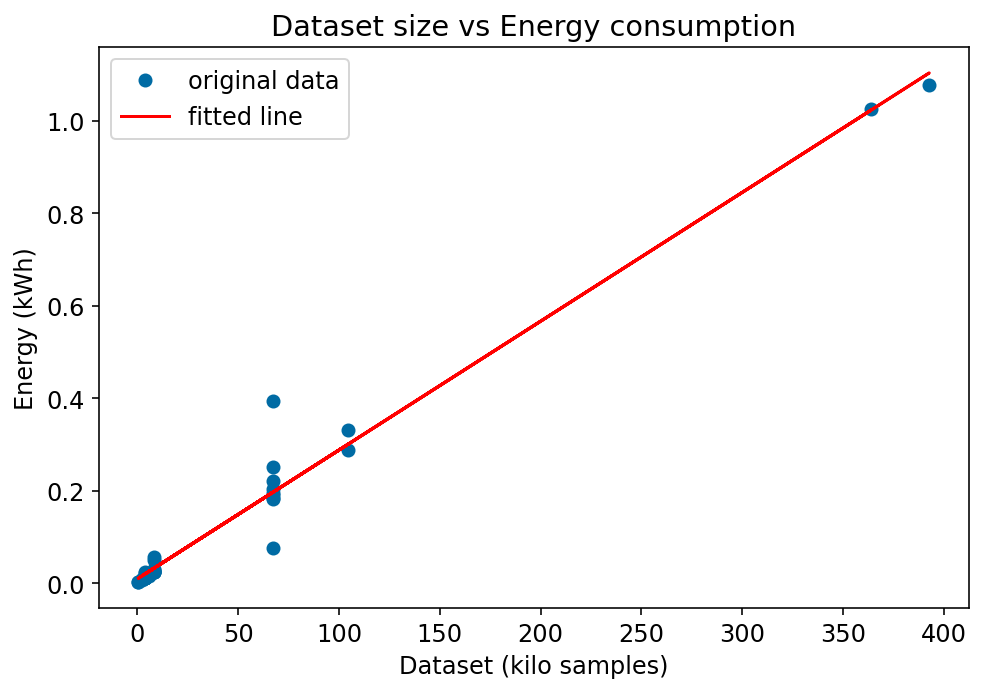

In [55]:
from scipy import stats
x = df_time_interval['dataset_size'] /1000
y = df_time_interval["pm_energy_consumption"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Dataset (kilo samples)")
plt.ylabel("Energy (kWh)")
plt.title("Dataset size vs Energy consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/dataVsPmPower.png',dpi=300)

slope -6.636694466666664e-05 
intercept 0.013821569575999998
r_value -0.8998045555087942
p_value 0.000949342072931127
std_err 1.216278605207347e-05
R squared  0.8096482381143788


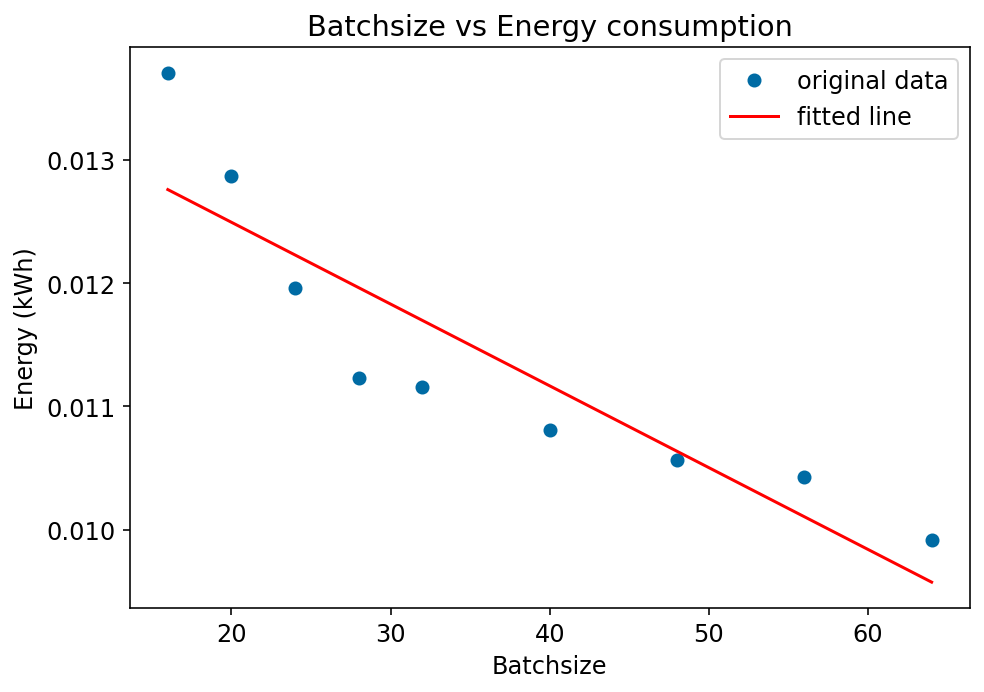

In [56]:
df_mrpc = df_time_interval.loc[(df_time_interval.dataset == 'MRPC') & (df_time_interval.max_seq_len == 128)]
df_mrpc =df_mrpc.sort_values('batchsize')
x = df_mrpc['batchsize']
y = df_mrpc["pm_energy_consumption"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Batchsize")
plt.ylabel("Energy (kWh)")
plt.title("Batchsize vs Energy consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/batchVsPmPower.png',dpi=300)

In [57]:
df_64 = df_time_interval.loc[(df_time_interval.batchsize == 64) & (df_time_interval.max_seq_len == 128)]
df_64 = df_64.sort_values('dataset_size')

In [58]:
# no cooling 
#df_64["datacenter_power"] = df_64["pm_energy_consumption"] * 1.58
#df_64["CO2e"] = df_64[datacenter_power] * #average co2e ???

In [59]:
df_co2 = pd.read_csv("results/co2data.csv")
df_co2.head()

,provider,providerName,offsetRatio,region,regionName,country,state,city,impact,source,comment,country_code,continent,continent_name
0,gcp,Google Cloud Platform,100,asia-east1,NaN,Taiwan,NaN,Changhua County,557.0,"measured on July 2, 2019 between 8 and 9 PM, ...",NaN,TW,AS,Asia
1,gcp,Google Cloud Platform,100,asia-east2,NaN,China,NaN,Hong Kong,702.0,https://www.sciencedirect.com/science/article/...,NaN,CN,AS,Asia
2,gcp,Google Cloud Platform,100,asia-northeast1,NaN,Japan,NaN,Tokyo,516.0,https://www.sciencedirect.com/science/article/...,NaN,JP,AS,Asia
3,gcp,Google Cloud Platform,100,asia-northeast2,NaN,Japan,NaN,Osaka,516.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,JP,AS,Asia
4,gcp,Google Cloud Platform,100,asia-south1,NaN,India,NaN,Mumbai,920.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,IN,AS,Asia


In [60]:
uk_co2 = df_co2.loc[df_co2.country == 'United Kingdom'].impact.mean()

In [61]:
df_64['CO2e'] = uk_co2 * df_64['pm_energy_consumption']
df_64['kg CO2e/kWh'] = df_64['CO2e'] /1000

In [62]:
features = ['dataset','total_time','total_energy','gpu_util','pm_energy_consumption','PFLOPs','kg CO2e/kWh']
df_64["time_in_hour"] = df_64["cpu_time"] / 3600
df_64[features]


,dataset,total_time,total_energy,gpu_util,pm_energy_consumption,PFLOPs,kg CO2e/kWh
21,WNLI,13.121,0.001916,86.753205,0.001955,25.816390,0.001218
3,RTE,43.493,0.006624,90.220930,0.007000,88.995842,0.004361
10,MRPC,62.892,0.009955,93.104839,0.009915,132.803863,0.006177
4,STS-B,102.504,0.016139,95.063168,0.016306,221.001972,0.010159
22,CoLA,143.519,0.023770,92.684397,0.022874,301.688725,0.014251
30,SST-2,1136.331,0.175588,93.989130,0.181335,2422.286655,0.112972
26,QNLI,1775.197,0.276078,94.669243,0.287262,3811.522709,0.178964
11,QQP,6527.775,0.959782,94.794252,1.024886,14034.283013,0.638504
36,MNLI,6826.956,1.021552,94.176631,1.077085,14581.872801,0.671024


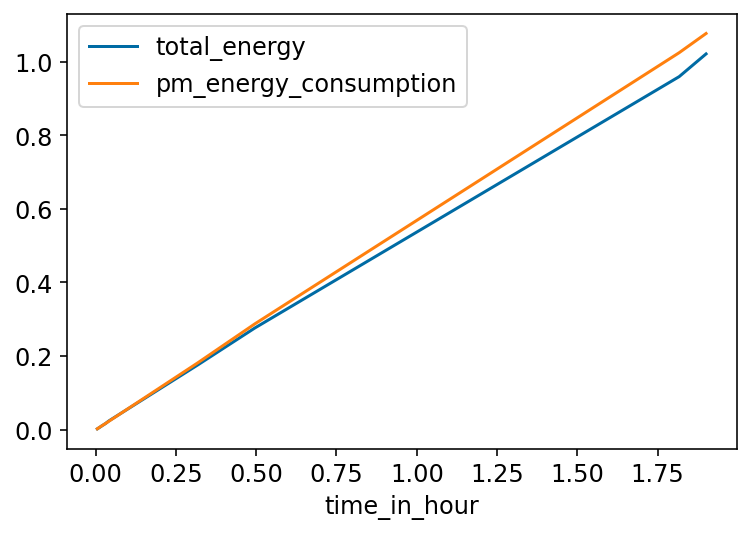

In [23]:
df_64.plot(x='time_in_hour', y=['total_energy','pm_energy_consumption'])

In [24]:
df_time_interval = df_time_interval.sort_values('dataset_size')
df_time_interval['CO2e'] = uk_co2 * df_time_interval['pm_energy_consumption']
df_time_interval['kg CO2e/kWh'] = df_time_interval['CO2e'] /1000
df_time_interval["time_in_hour"] = df_time_interval["cpu_time"] / 3600

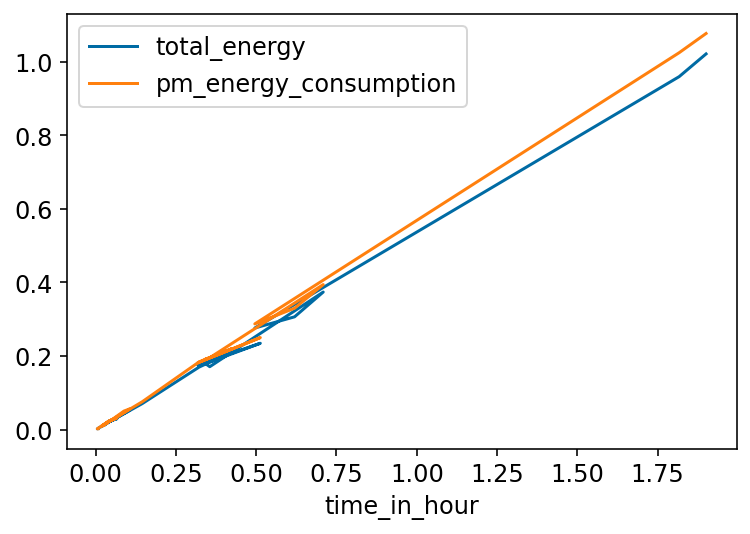

In [25]:
df_time_interval.plot(x='time_in_hour', y=['total_energy','pm_energy_consumption'])

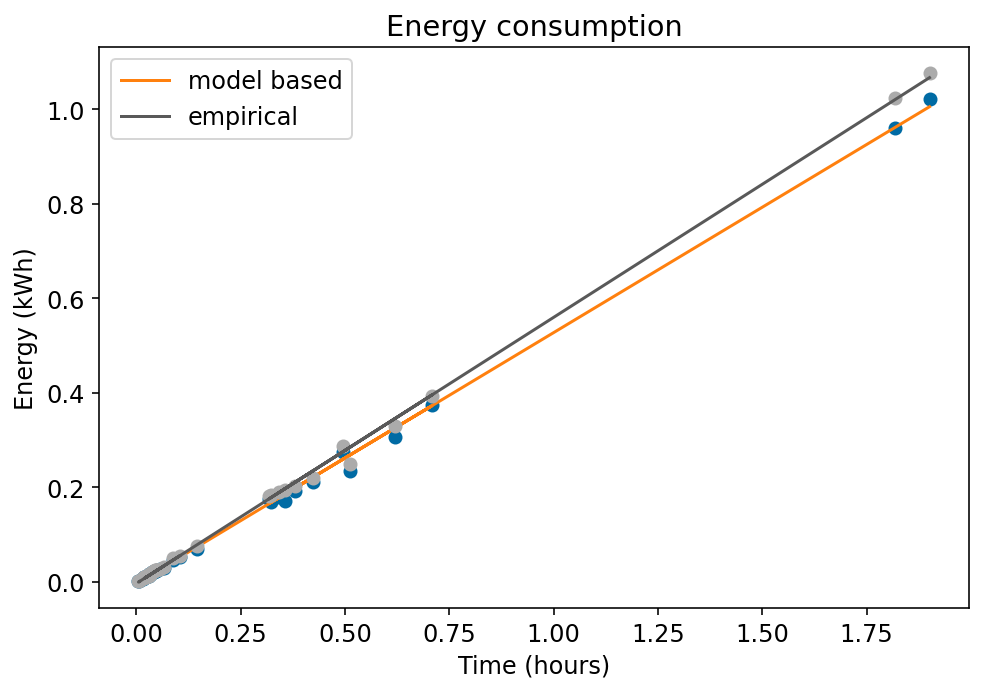

In [26]:
x = df_time_interval['time_in_hour']
y1 = df_time_interval['total_energy']
y2 = df_time_interval['pm_energy_consumption']
plt.figure(figsize=(7,5))
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y1)
plt.plot(x, y1,'o')
plt.plot(x, slope * x + intercept, label='model based')
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y2)
plt.plot(x, y2,'o')
plt.plot(x, slope * x + intercept, label='empirical')
plt.xlabel("Time (hours)")
plt.ylabel("Energy (kWh)")
plt.title("Energy consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/nvidiaVsPMPower.png',dpi=300)

In [27]:
## uncomment for new readings
#df_time_interval.to_csv("results/model_pm_energy_finetune.csv", index=False)
# remember to append value in july notebook july-nvidia-smi-data.ipynb

# Carbon footprint daily, monthly and annually
approx downloads in 30 days from pytorch huggingface 

In [28]:
df_time_interval = pd.read_csv("results/model_pm_energy_finetune.csv")

In [29]:
{"distilbert-base-uncased": 12064112,
"bert-base-uncased": 5101339,
"bert-base-cased": 1842725}

{'distilbert-base-uncased': 12064112,
 'bert-base-uncased': 5101339,
 'bert-base-cased': 1842725}

In [30]:
df_time_interval['monthly_consumption'] = 5000000 * df_time_interval['pm_energy_consumption']
df_time_interval['daily_consumption'] = df_time_interval['monthly_consumption'] /30
df_time_interval['yearly_consumption'] = 12 * df_time_interval['monthly_consumption']
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,e_time,pm_mean_power,pm_power,pm_energy_consumption,CO2e,kg CO2e/kWh,time_in_hour,monthly_consumption,daily_consumption,yearly_consumption
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,15:14:03,313.894375,0.001406,0.002093,1.303708,0.001304,0.007012,10463.145833,348.771528,125557.75
1,WNLI,64,128,200.790800,13.121,0.001464,0.001394,86.753205,84.923077,88.583333,...,10:34:19,335.081429,0.001221,0.001955,1.217742,0.001218,0.005323,9773.208333,325.773611,117278.50
2,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,09:42:52,494.139235,0.005970,0.007000,4.361191,0.004361,0.013760,35001.529167,1166.717639,420018.35
3,RTE,32,128,204.094851,51.571,0.005847,0.005726,90.915294,86.470588,95.360000,...,21:58:36,463.925000,0.006646,0.007732,4.817088,0.004817,0.016284,38660.416667,1288.680556,463925.00
4,MRPC,24,128,208.408171,83.879,0.009712,0.009494,91.000000,86.926829,95.073171,...,19:26:13,478.341833,0.011145,0.011959,7.450174,0.007450,0.024978,59792.729167,1993.090972,717512.75


In [31]:
df_time_interval['daily_CO2e'] = uk_co2 * df_time_interval['daily_consumption']
df_time_interval['daily kg CO2e/kWh'] = df_time_interval['daily_CO2e'] /1000
df_time_interval['monthly_CO2e'] = uk_co2 * df_time_interval['monthly_consumption']
df_time_interval['monthly kg CO2e/kWh'] = df_time_interval['monthly_CO2e'] /1000
df_time_interval['yearly_CO2e'] = uk_co2 * df_time_interval['yearly_consumption']
df_time_interval['yearly kg CO2e/kWh'] = df_time_interval['yearly_CO2e'] /1000

In [32]:
# mean values 
mean_df = pd.DataFrame()
mean_df['process'] = ["Finetuning"]
mean_df['daily_consumption'] = [df_time_interval['daily_consumption'].mean()]
mean_df['monthly_consumption'] = [df_time_interval['monthly_consumption'].mean()]
mean_df['yearly_consumption'] = [df_time_interval['yearly_consumption'].mean()]
mean_df['daily_co2'] = [df_time_interval['daily kg CO2e/kWh'].mean()]
mean_df['monthly_co2'] = [df_time_interval['monthly kg CO2e/kWh'].mean()]
mean_df['yearly_co2'] = [df_time_interval['yearly kg CO2e/kWh'].mean()]

In [33]:
# mean values 
finetune_array = [ "Finetuning",
                  df_time_interval['daily_consumption'].mean(),
                  df_time_interval['monthly_consumption'].mean(),
                  df_time_interval['yearly_consumption'].mean(),
                  df_time_interval['daily kg CO2e/kWh'].mean(),
                  df_time_interval['monthly kg CO2e/kWh'].mean(),
                  df_time_interval['yearly kg CO2e/kWh'].mean()]

In [34]:
#mean_df.to_csv("logs/approx_consumption.csv", index=False)

In [35]:
finetune_array

['Finetuning',
 21805.60717592593,
 654168.2152777778,
 7850018.583333333,
 13584.893270601853,
 407546.79811805557,
 4890561.577416668]

In [36]:
import json
with open("logs/finetune_consumption_data.txt", "w") as newfile:
    json.dump(finetune_array, newfile)

# dataset size vs energy consumption

Used for section 'Strategies to reduce carbon footprint'

slope 0.0027874538772628857 
intercept 0.008812492212491044
r_value 0.9859189286007548
p_value 2.4143077063432705e-30
std_err 7.77256264901302e-05
R squared  0.9720361337732603


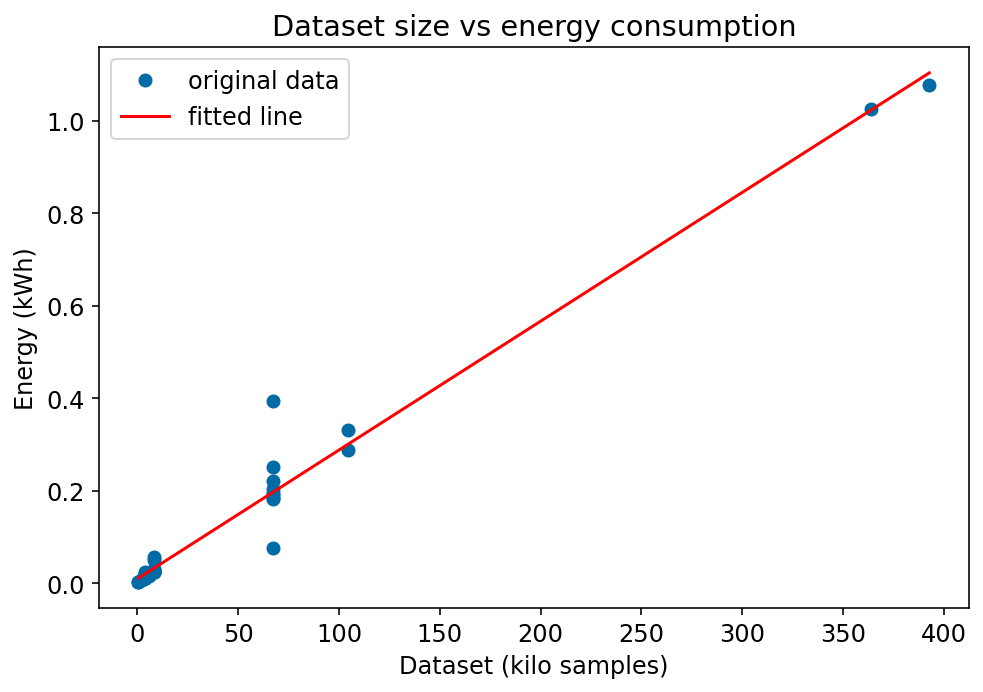

In [39]:
from scipy import stats
x = df_time_interval['dataset_size'] /1000
y = df_time_interval["pm_energy_consumption"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Dataset (kilo samples)")
plt.ylabel("Energy (kWh)")
plt.title("Dataset size vs energy consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/DatasetvsEnergyCor.png',dpi=300)

slope 17.74759718184149 
intercept 72.1211708524296
r_value 0.9835818477714977
p_value 4.0555241088648096e-29
std_err 0.5353223767433997
R squared  0.9674332512655937


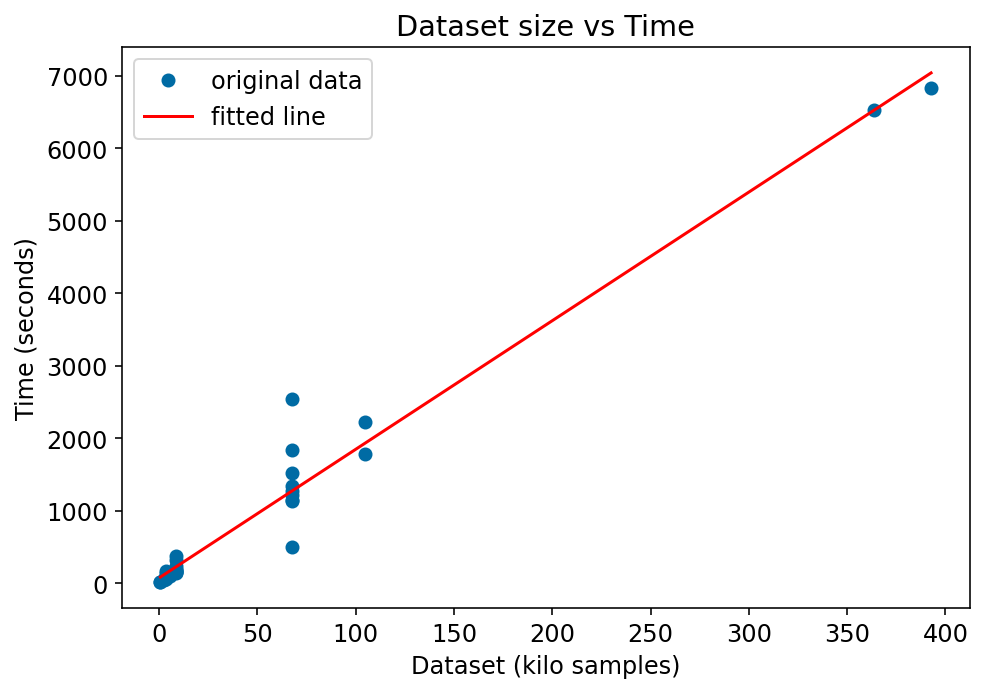

In [41]:
from scipy import stats
x = df_time_interval['dataset_size'] /1000
y = df_time_interval["total_time"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Dataset (kilo samples)")
plt.ylabel("Time (seconds)")
plt.title("Dataset size vs Time")
plt.legend()
plt.tight_layout()
plt.savefig('viz/DatasetvsTimeCor.png',dpi=300)